In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [189]:
data = pd.read_csv('/Users/hanifemamgholizadeh/Desktop/patter_recognition/data/nonlinear_gp_dataset.csv')
data.head()

,x,y
0,-5.000000,0.128385
1,-4.655172,0.100500
2,-4.310345,0.208329
3,-3.965517,0.304584
4,-3.620690,0.100849


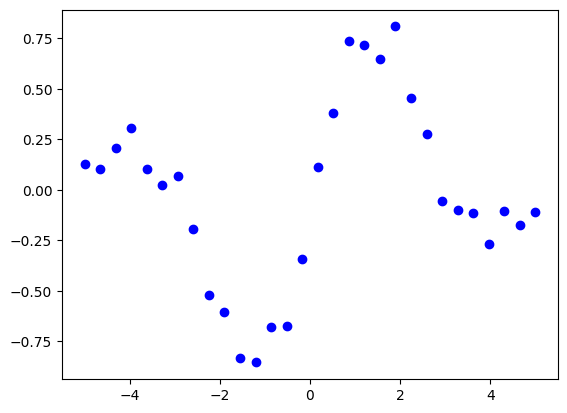

In [190]:
X = np.array(data[['x']].values)
y = np.array(data['y'].values)
plt.scatter(X, y, color='blue', label='Data points')

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(type(X_train), X_train.shape)

<class 'numpy.ndarray'> (24, 1)


In [192]:
def rbf_kernel(X_i, X_z, sigma=1.0):
    """Radial Basis Function (RBF) kernel."""
    sqdist = np.sum(X_i**2, 1).reshape(-1, 1) + np.sum(X_z**2, 1) - 2 * X_i @ X_z.T
    return np.exp(-0.5 / sigma**2 * sqdist)

In [193]:
def kernel (X_i, X_z, sigma=1.0):
    return rbf_kernel(X_i, X_z, sigma)

## Gaussian processes without noise

In [194]:
def gaussian_process(X_train, y_train, X_test):
    """Gaussian Process Regression."""
    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    k = kernel(X_train, X_train, sigma=1.0)
    k_star = kernel(X_train, X_test, sigma=1.0)
    k_star_star = kernel(X_test, X_test, sigma=1.0)
    print("k shape:", k.shape)
    print("k_star shape:", k_star.shape)    
    print("k_star_star shape:", k_star_star.shape)
    mean = (k_star.T @ np.linalg.inv(k)) @ y_train
    cov = k_star_star - k_star.T @ (np.linalg.inv(k) @ k_star)
    
    return mean, cov

In [195]:
mean_test, cov_test = gaussian_process(X_train, y_train, X_test)
mean_test, cov_test

X_train shape: (24, 1)
y_train shape: (24,)
X_test shape: (6, 1)
k shape: (24, 24)
k_star shape: (24, 6)
k_star_star shape: (6, 6)


(array([-2.23922891,  0.05372211,  0.43414562,  0.76876908, -0.27537659,
        -0.39388435]),
 array([[ 2.82628039e-07, -9.37657940e-09, -2.41020812e-08,
          1.02365093e-08,  1.35000825e-08,  1.22603857e-08],
        [-6.73345863e-09,  8.46410098e-09,  1.14534283e-08,
          4.61483107e-09,  4.18704996e-09,  1.99162648e-08],
        [-2.43900535e-08,  8.19132790e-09,  5.27283495e-09,
         -5.20035214e-09,  1.09856345e-09, -1.17187104e-10],
        [ 1.32828359e-08,  1.33452593e-09,  4.74033292e-09,
         -1.65838876e-09,  1.87100800e-09,  5.19682933e-09],
        [ 1.46212804e-08,  7.17775806e-09,  9.46946494e-09,
          8.48643383e-09, -3.09143022e-09,  8.51352533e-09],
        [ 1.62732485e-08,  4.03289119e-09,  1.55652751e-08,
          9.05463469e-09, -2.00972483e-09,  1.40239507e-08]]))

/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_82691/370391852.py:5: RuntimeWarning: invalid value encountered in sqrt
  std_sorted = np.sqrt(np.diag(cov_test))[sorted_indices]  # This is essential


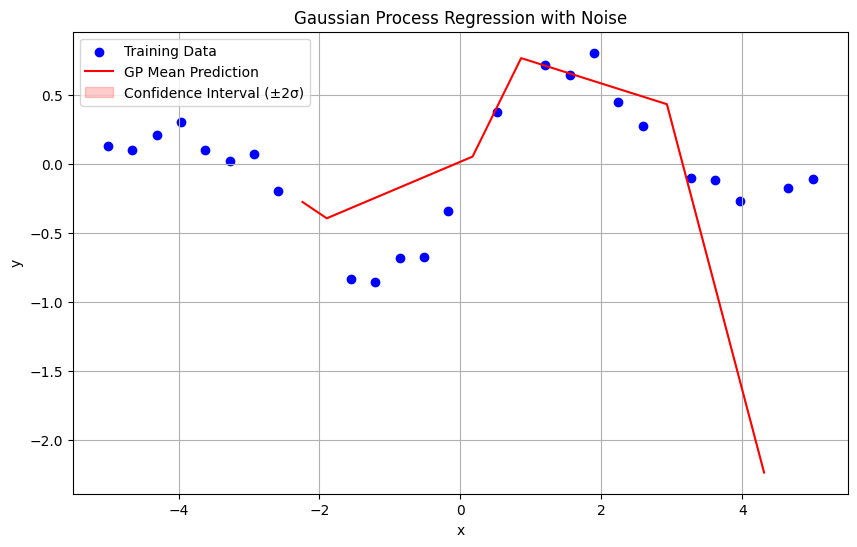

In [196]:
# Ensure mean_test, cov_test, X_test are already defined from GP
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test.flatten()[sorted_indices]
mean_sorted = mean_test[sorted_indices]
std_sorted = np.sqrt(np.diag(cov_test))[sorted_indices]  # This is essential

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_test_sorted, mean_sorted, color='red', label='GP Mean Prediction')
plt.fill_between(
    X_test_sorted,
    mean_sorted - 2 * std_sorted,
    mean_sorted + 2 * std_sorted,
    color='red',
    alpha=0.2,
    label='Confidence Interval (±2σ)'
)
plt.title("Gaussian Process Regression with Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


## Guassian process with noise

In [197]:
def gaussian_process_with_noise(X_train, y_train, X_test, sigma=2.0, noise=1e-8):
    """Gaussian Process Regression."""
    k = kernel(X_train, X_train, sigma) + noise * np.eye(len(X_train))
    k_star = kernel(X_train, X_test, sigma)
    k_star_star = kernel(X_test, X_test, sigma)
    
    k_inv = np.linalg.inv(k)
    
    mean = k_star.T @ k_inv @ y_train
    cov = k_star_star - k_star.T @ k_inv @ k_star
    
    return mean.flatten(), cov

In [198]:
mean_test, cov_test = gaussian_process_with_noise(X_train, y_train, X_test)
mean_test, cov_test

(array([-0.23318108,  0.00534999,  0.0875762 ,  0.57290756, -0.37601731,
        -0.61187474]),
 array([[ 1.33759558e-08,  1.11450633e-09,  1.31297162e-09,
          2.83016241e-09, -1.32416616e-09, -1.29366936e-09],
        [ 4.61344711e-09, -1.51442079e-08,  7.25003890e-10,
         -1.36166860e-08, -1.73698557e-08, -1.94956651e-08],
        [-1.39014324e-08, -2.96818096e-08, -1.57998692e-08,
         -3.07460385e-08, -1.00911796e-08, -1.29505154e-08],
        [-5.41952619e-09, -2.98441325e-08, -1.53335549e-08,
         -2.60520581e-08, -9.19529392e-09, -1.28053822e-08],
        [-1.50586330e-09, -6.10317158e-09, -4.18023011e-09,
         -8.54999216e-09,  9.61591473e-09,  7.24286342e-09],
        [-4.02249365e-09, -2.95139153e-08, -1.21707559e-08,
         -2.96680458e-08, -2.61213673e-09, -5.43838063e-09]]))

/var/folders/n4/8zh_hhf525v6v_00z9234_0h0000gn/T/ipykernel_82691/370391852.py:5: RuntimeWarning: invalid value encountered in sqrt
  std_sorted = np.sqrt(np.diag(cov_test))[sorted_indices]  # This is essential


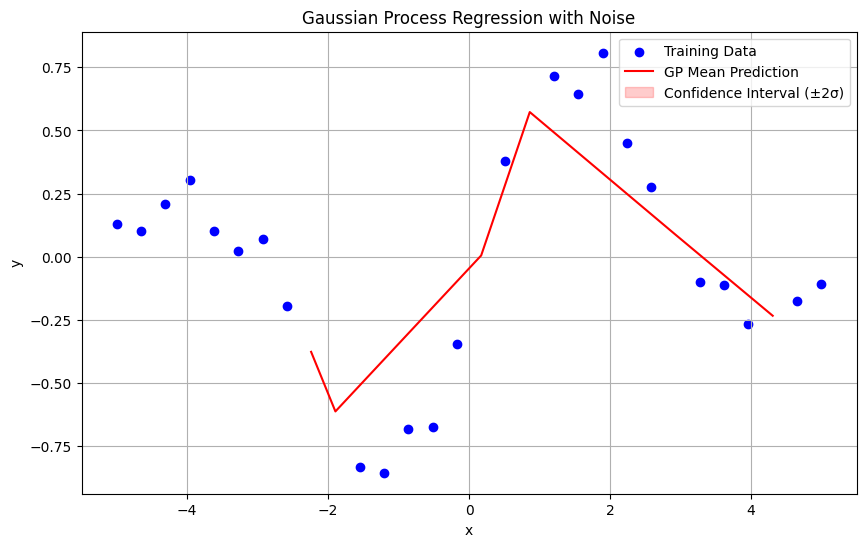

In [ ]:
# Ensure mean_test, cov_test, X_test are already defined from GP
sorted_indices = np.argsort(X_test.flatten())
X_test_sorted = X_test.flatten()[sorted_indices]
mean_sorted = mean_test[sorted_indices]
std_sorted = np.sqrt(np.diag(cov_test))[sorted_indices]  # This is essential

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Training Data')
plt.plot(X_test_sorted, mean_sorted, color='red', label='GP Mean Prediction')
plt.fill_between(
    X_test_sorted,
    mean_sorted - 2 * std_sorted,
    mean_sorted + 2 * std_sorted,
    color='red',
    alpha=0.2,
    label='Confidence Interval (±2σ)'
)
plt.title("Gaussian Process Regression with Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
